# Simulation of a positron-induced Muon Source (part 1)


### Authors:
* Saverio Monaco
* Marianna Zeragic De Giorgio
* Gerardo Javier Carmona
* Hilario Capettini 

### Description

The production of a high brillance muon beam is one of the most important challenge for the future of Particle Physics. A particularly interesting idea consists of shooting high energy positrons on a target, aiming at the production of muons by means of the process $e^+ + e^- \rightarrow \mu^+ + \mu^-$. To mimize the divergence of the resulting "muon beam", the positrons energy is chosen so that the reaction occurs close to threshold (assuming the electrons in the target to be at rest). The main goal of this project is to produce a Monte Carlo simulation of such a process. 


### References

* [LEMMA](https://arxiv.org/pdf/1509.04454.pdf) paper. The original paper describing the positron-induced low emittance muon source, ehere all the relevant kinematic features of the process have been studied
* [Babayaga](https://www2.pv.infn.it/~hepcomplex/babayaga.html) event generator. You may want to install and run it as a comparison for your results.
* [2018 Experiment](https://arxiv.org/pdf/1909.13716.pdf): the paper describing the (very poor..) results of the experiment carried out in summer 2018
* [2021 proposal](https://cds.cern.ch/record/2712394?ln=en): the proposal for the experiment in 2021


### Contact

* Marco Zanetti <marco.zanetti@unipd.it>
* Camilla Curatolo <camilla.curatolo@pd.infn.it>
* Jacopo Pazzini <jacopo.pazzini@unipd.it>
* Alberto Zucchetta <alberto.zucchetta@pd.infn.it>

## Analytical part

1. Compute the process leading-order cross section, $\sigma(\theta; \sqrt{s})$, as a function of the scattering angle $\theta$ and with the  center of mass energy $\sqrt{s}$ as a parameter. Start by computing it in the center of mass system. N.B.: textbooks reports such cross section in the relativistic limit, i.e. for $\sqrt{s}\gg m_\mu$, which is clearly not the case here ($\sqrt{s}\sim 2m_\mu$);

2. compute and display the angle and momentum components distributions of the emerging muon pairs;

3. boost muons four-momenta in the laboratory frame, i.e. in the frame where the electron is at rest and the positron has enough energy to give rise to the process;

In [1]:
#Import the required packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.integrate as integrate
import csv
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import math

In [2]:
#Define the universal constants
muon_mass       = 0.1056583745       #[GeV]
electron_mass   = 0.00051099894      #[GeV]
alpha           = 0.007297           #[]            #CHECK
Avogadro_number = 6.02214076e23      #[#/mol]

The differential cross section was obtained from [MANDELN] and it is  $$\left(\frac{d\sigma}{d\Omega}\right)_{CM}=\frac{2\,\alpha^2}{s^2}\frac{|p'|}{\sqrt{s}}\left(\frac{s}{4}+p'^2\cos^2\vartheta+m_\mu^2\right)$$

Using the relativistic total energy  $$E_{CM}^2=4p'^2+4m_\mu^2\rightarrow p'^2=\frac{E_{CM}^2}{4}-m_\mu^2\rightarrow p'^2=\frac{s}{4}-m_\mu^2$$

The differential cross section can be rewritten as:
$$\left(\frac{d\sigma}{d\Omega}\right)_{CM}=\frac{2\,\alpha^2}{s}\sqrt{\frac{1}{4}-\frac{m_\mu^2}{s}}\left[\left(\frac{1}{4}+\frac{m_\mu^2}{s}\right)+\left(\frac{1}{4}- \frac{m_\mu^2}{s}\right)\cos^2{\theta}\right]$$

Integrating over the solid angle we obtain the total cross section as a function of the total center of mass energy:
$$\sigma(s)=\frac{8\pi\,\alpha^2}{3\,s}\sqrt{\frac{1}{4}-\frac{m_\mu^2}{s}}\left[1 + 2\frac{m_\mu^2}{s}\right]$$

To obtain the Probability Density Function (PDF) the integration must be performed only over the azymuthal angle $\phi$ and as a result we obtain a function of the polar angle $\theta$ with the center of mass energy $\sqrt{s}$ as a parameter.
$$PDF(\theta)=\frac{4\pi\,\alpha^2}{s}\sqrt{\frac{1}{4}-\frac{m_\mu^2}{s}}\left[\left(\frac{1}{4}+\frac{m_\mu^2}{s}\right)+\left(\frac{1}{4}- \frac{m_\mu^2}{s}\right)\cos^2{\theta}\right]$$

This PDF is not normalized but it is easily done dividing it through the total cross section. 


In [3]:
#rs is the sqrt(s)= E
#The units are Barn so 1ub = 2.56819e-3  GeV^-2      
gev_to_ub = 389.379

def cros_section(rs):
    # OLD y = np.pi * alpha**2 / (4*rs**2) * np.sqrt(1/4 - muon_mass**2 / rs**2) * (13/12 + 2/3 * muon_mass**2 / rs**2)
    y = 8 *np.pi * alpha**2 / (3*rs**2) * np.sqrt(1/4 - muon_mass**2 / rs**2) * (1 + 2 * muon_mass**2 / rs**2)
    return y * gev_to_ub
    
def dif_cross_section(rs,theta):
    # OLD y = alpha**2/(16 * rs**2)* np.sqrt(1/4 - muon_mass**2/rs**2) * (1 + muon_mass**2 / rs**2 + (1/4 -muon_mass**2/rs**2)*np.cos(theta)**2)
    y = 2 * alpha**2 / rs**2 * np.sqrt(1/4 - muon_mass**2 / rs**2) * (1/4 + muon_mass**2 / rs**2 + (1/4 - muon_mass**2 / rs**2)*np.cos(theta)**2)
    return y * gev_to_ub

def pdf_theta(rs,theta):
    y = 2*np.pi *np.sin(theta)*dif_cross_section(rs,theta)
    return y
    
def pdf_theta_normalized(rs,theta):
    y =pdf_theta(rs,theta)/cros_section(rs)
    return y




def pdf_p(rs,theta):
    y = 0
    return y
    
def pdf_p_normalized(rs,theta):
    y =pdf_p(rs,theta)/cros_section(rs)
    return y

In [4]:
#Functions
def plot_momenta_hist(px,py,pz,title,color):
    fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
   
    n, bins, _ = ax1.hist(px, bins=50,color=color, ec='grey')
    ax1.set_xlabel(r'$p_x$ [GeV]', fontsize=15)
    ax1.set_ylabel('Counts', fontsize=15)
    ax1.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


    n, bins, _ = ax2.hist(py, bins=50,color=color, ec='grey')
    ax2.set_title(title, fontsize=15)
    ax2.set_xlabel(r'$p_y$ [GeV]', fontsize=15)
    ax2.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))



    n, bins, _ = ax3.hist(pz, bins=50,color=color, ec='grey')
    ax3.set_xlabel(r'$p_z$ [GeV]', fontsize=15)
    ax3.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
    ax3.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    plt.show() 
    
def plot_angles_hist(theta,phi,colort,colorp):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    n, bins, _ = ax1.hist(theta, bins=50,color=colort, ec='black')
    ax1.set_title(r'$\mu^+$', fontsize=20)
    ax1.set_xlabel(r'$\theta$ [°]', fontsize=20)
    ax1.set_ylabel('Counts', fontsize=20)
    ax1.ticklabel_format(axis="y", style="sci", scilimits=(5,5))

    n, bins, _ = ax2.hist(phi, bins=50,color=colorp, ec='black')
    ax2.set_title(r'$\mu^+$', fontsize=20)
    ax2.set_xlabel(r'$\phi$ [°]', fontsize=20)
    ax2.ticklabel_format(axis="y", style="sci", scilimits=(5,5))

    plt.show()

In [5]:
#
###
####
#####
######
####### Analysis
######
#####
###
##
#

In [6]:
##################################################################################
#Analysis parameters
delta = 0.001
E = 2 * muon_mass + delta  #This is the proposed energy just above the threshold
N = 10**7
deg=180/np.pi #Conversion radiants to degrees

###################################################################################

In [7]:
print("Momentum in the CM", '%.5f' % np.sqrt(E**2/4-muon_mass**2), "GeV")
print("Total relativistic energy in the CM", '%.5f' % E, "GeV")
print("Cross section", '%.5f' % cros_section(E), "barn")

Momentum in the CM 0.01029 GeV
Total relativistic energy in the CM 0.21232 GeV
Cross section 0.27927 barn


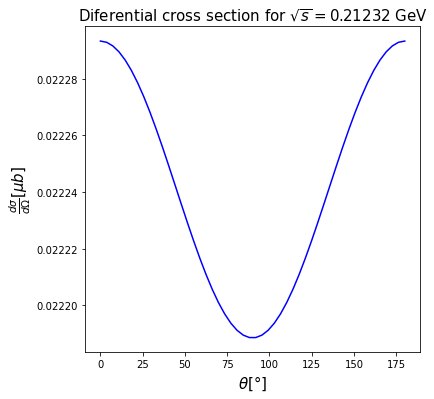

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
theta = np.linspace(0,np.pi)
ax.plot(theta*deg, dif_cross_section(E,theta),color='blue', label='PDF')

plt.title(r'Diferential cross section for $\sqrt{s}=$'+str('%.5f' % E)+str(" GeV"), fontsize=15)
plt.xlabel(r'$ \theta [°] $', fontsize=15)
plt.ylabel(r'$ \frac{d\sigma}{d\Omega} [\mu b]$', fontsize=15)
#plt.legend()
plt.show()

<ipython-input-3-ae1f53d0056a>:7: RuntimeWarning: invalid value encountered in sqrt
  y = 8 *np.pi * alpha**2 / (3*rs**2) * np.sqrt(1/4 - muon_mass**2 / rs**2) * (1 + 2 * muon_mass**2 / rs**2)
<ipython-input-3-ae1f53d0056a>:7: RuntimeWarning: invalid value encountered in sqrt
  y = 8 *np.pi * alpha**2 / (3*rs**2) * np.sqrt(1/4 - muon_mass**2 / rs**2) * (1 + 2 * muon_mass**2 / rs**2)


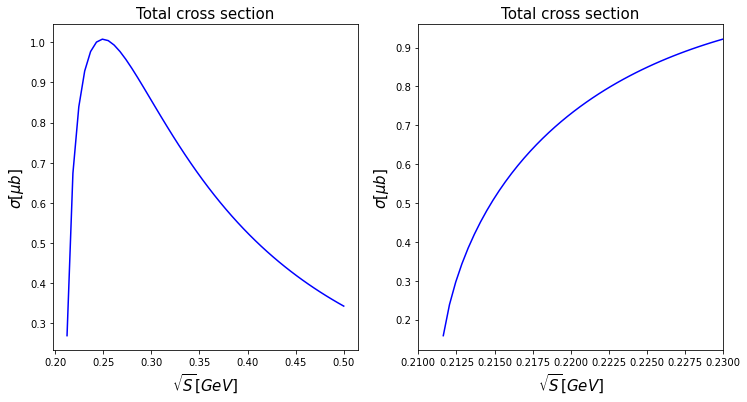

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
rs = np.linspace(0.2, 0.5)
ax1.plot(rs, cros_section(rs),color='blue', label='PDF')

ax1.set_title('Total cross section', fontsize=15)
ax1.set_xlabel(r'$ \sqrt{S} [GeV]$', fontsize=15)
ax1.set_ylabel(r'$ \sigma [\mu b]$', fontsize=15)
#plt.legend()

rs = np.linspace(0.21, 0.23)
ax2.plot(rs, cros_section(rs),color='blue', label='PDF')

ax2.set_title('Total cross section', fontsize=15)
ax2.set_xlabel(r'$ \sqrt{S} [GeV]$', fontsize=15)
ax2.set_ylabel(r'$ \sigma [\mu b]$', fontsize=15)
ax2.set_xlim(0.21,0.23)
plt.show()

Angular distribution


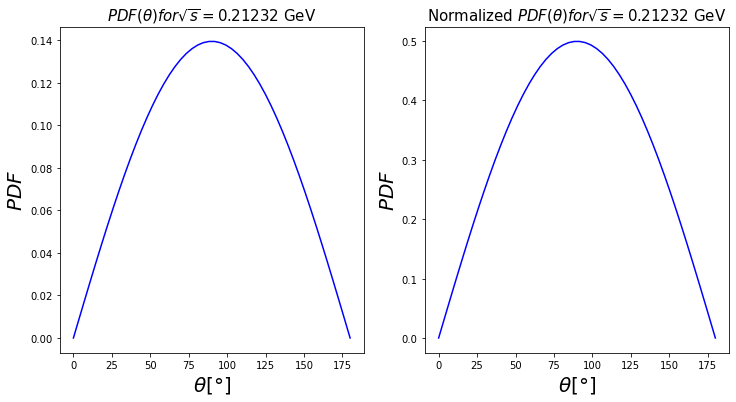

Check the normalization
Integral of the PDF in [0,pi] 0.27927
Integral of the normalized PDF in [0,pi] 1.00000


In [10]:
print('Angular distribution')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

theta = np.linspace(0, np.pi)


ax1.plot(theta*deg, pdf_theta(E,theta),color='blue', label='PDF')
ax1.set_title(r'$ PDF(\theta) for \sqrt{s}=$'+str('%.5f' % E)+str(" GeV"), fontsize=15)
ax1.set_xlabel(r'$ \theta [°] $', fontsize=20)
ax1.set_ylabel(r'$ PDF$', fontsize=20)
#plt.legend()



ax2.plot(theta*deg, pdf_theta_normalized(E,theta),color='blue', label='PDF')
ax2.set_title(r'Normalized $ PDF(\theta) for \sqrt{s}=$'+str('%.5f' % E)+str(" GeV"), fontsize=15)
ax2.set_xlabel(r'$ \theta [°] $', fontsize=20)
ax2.set_ylabel(r'$ PDF$', fontsize=20)
plt.show()

print('Check the normalization')
x2 = lambda x: pdf_theta(E,x)
print('Integral of the PDF in [0,pi]', "{:.5f}".format(integrate.quad(x2, 0., np.pi)[0]))
x2 = lambda x: pdf_theta_normalized(E,x)
print('Integral of the normalized PDF in [0,pi]', "{:.5f}".format(integrate.quad(x2, 0., np.pi)[0]))

## Monte Carlo Simulation

4. write a Monte Carlo simulation that generates scattering events following the distrubtions that you found analytically; 
5. produce a synthetic dataset of about $N=10^5$ (or more) events. Events should be listed as rows in a file with columns representing the muons coordinates (keep in mind that in the lab frame muons are relativistic and thus the number of coordinates can be only 3 per muon);


In [11]:
#
###
####
#####
######
#######
######
#####
###
##
#

In [12]:
def inv_cdf(rs,r):
    s = rs**2
    p = 3*(s+4*muon_mass**2)/(s-4*muon_mass**2)
    q = 4*(2*r-1)*(s+2*muon_mass**2)/(s-4*muon_mass**2)
    h = p**3/27+q**2/4
    cos_t = np.cbrt(-q/2+np.sqrt(h))+np.cbrt(-q/2-np.sqrt(h))
    rand_theta = np.arccos(cos_t)
    return rand_theta

def new_pdf_theta(rs,theta):
    s = rs**2
    y = 3/8*np.sin(theta)/(s+2*muon_mass**2)*((s-4*muon_mass**2)*np.cos(theta)**2+s+4*muon_mass**2)
    return y

In [13]:
#Inputs
#box = [0,np.pi,0.0,0.5] #Box coordinates [x0,x1,y0,y1] for analysis
                        #We choose the size to optimize the ammount of useful particles

In [14]:
## DEPRECATED
#def accept_reject(N,pdf,box,cm_energy):
#    x = np.random.uniform(box[0], box[1], N)
#    y = np.random.uniform(box[2], box[3], N)
#    
#    accepted = x[y<=pdf(cm_energy,x)]
#    return accepted
   

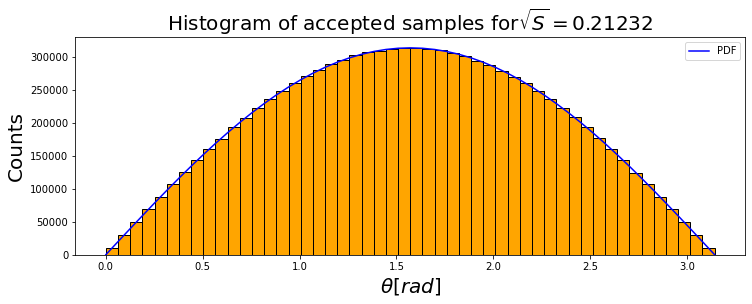

In [15]:
# Plot scaled histogram
fig, ax = plt.subplots(figsize=(12,4))

n, bins, _ = ax.hist(inv_cdf(E,np.random.random(N)), bins=50, color='orange', ec='black')

d = (bins[1]-bins[0])
scaling = d * n.sum()
ax.plot(bins, pdf_theta_normalized(E,bins)*scaling, color='blue', label='PDF')

plt.title('Histogram of accepted samples for'r'$ \sqrt{S}=$'+str('%.5f' % E), fontsize=20)
plt.xlabel(r'$ \theta [rad]$', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.legend()
plt.show()

In [16]:
#Comparison with BabaYaga algorithm











In [17]:
#
###
####
#####
######
####### SIMULATION 1
######
#####
###
##
#

In [18]:
##################################################################################
#Simulation parameters

delta = 0.001
E = 2 * muon_mass + delta  #This is the proposed energy just above the threshold
N = 10**7

###################################################################################

In [19]:
#Obtain the parameters distribution
theta_instances = inv_cdf(E,np.random.random(N))
#N_instances     = len(theta_instances)
phi_instances   = np.random.uniform(0., 2*np.pi, N)

#The resulting space-momentum magnitude for each muon is the square of half the com energy minus the square of the muon mass.
p = np.sqrt(E**2/4-muon_mass**2)

In [20]:
#Obtain the muons momenta and build the file  (Is it in the CoM frame?)

pxm = p * np.sin(theta_instances)*np.cos(phi_instances)
pym = p * np.sin(theta_instances)*np.sin(phi_instances)
pzm = p * np.cos(theta_instances)

pxam = -pxm
pyam = -pym
pzam = -pzm

In [21]:
#Write the results to a file
print(r'$\sqrt(s)$', '%.5f' % E, "GeV")
print('Norm of p ', '%.5f' % p, "GeV")
#file_name='muons_momentum_com.csv'
#data=pd.read_csv(file_name)
#data

$\sqrt(s)$ 0.21232 GeV
Norm of p  0.01029 GeV


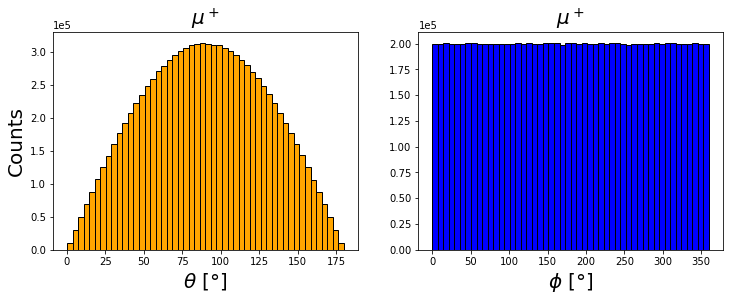

In [22]:
plot_angles_hist(theta_instances*deg, phi_instances*deg,'orange','blue')

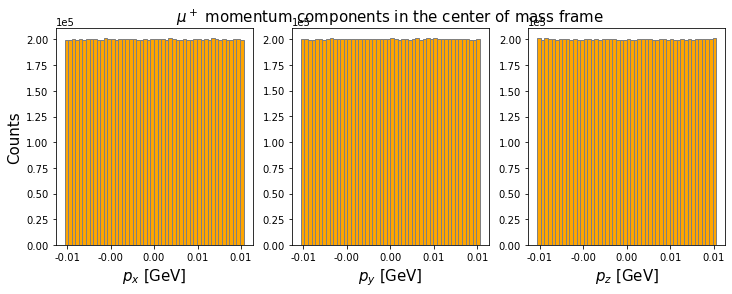

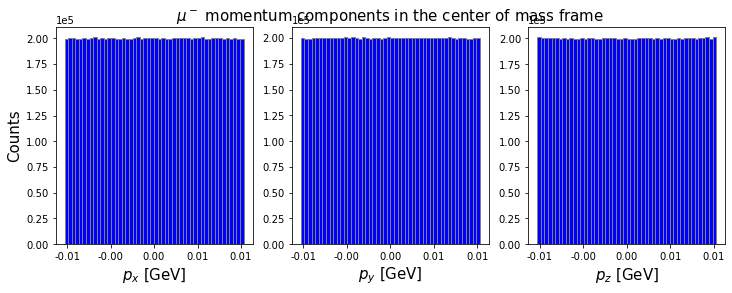

In [23]:
plot_momenta_hist(pxm,pym,pzm,r'$\mu^+$ momentum components in the center of mass frame','orange')
plot_momenta_hist(pxam,pyam,pzam,r'$\mu^-$ momentum components in the center of mass frame','blue')

In [24]:
#Inser Pandas table with some statistics



<img src="img/comframe.svg" width="600" style="float: left;">

The Lab frame is the frame where the electrons are at rest (in a target). In order to transpose the problem from the center of mass frame in this other frame, it is important to consider Special Relativity in the calculations, being the electron and positron highly energetic (in order to produce the muon pair).

The generic boost in a frame moving with velocity $u$ in the z direction is:

$$\Lambda = \left(\begin{array}{c}
           \gamma & 0 & 0 & -u\gamma \\
           0 & 1  & 0 & 0 \\
           0    &  0      & 1 & 0 \\
           -u\gamma     &  0       & 0 & \gamma \\ 
\end{array}\right)$$

In our case since the velocity is negative, the Lorentz Matrix for the electron moving at velocity $-v$ in the CoM frame is:

$$\Lambda = \left(\begin{array}{c}
           \gamma & 0 & 0 & v\gamma \\
           0 & 1  & 0 & 0 \\
           0    &  0      & 1 & 0 \\
           v\gamma     &  0       & 0 & \gamma \\ 
\end{array}\right)$$

Since the electron is moving exclusively in the $z$ direction in the CoM frame, we can derive its velocity from the definition of relativistic momentum:
$$p=m_e\gamma v\to v\gamma = \frac{p}{m_e}\to \frac{v}{\sqrt{1-v^2}}=\frac{p}{m_e}\to v= \frac{p}{m_e\sqrt{1+\frac{p^2}{m_e^2}}}=\frac{p}{\sqrt{m_e^2 + p^2}}$$

Notice that the energy of the particle in the COM is $E_p=\sqrt{m_e^2+p^2}$ (the denominator)

$$\begin{cases}E_p^2=m_e^2+p^2\\ E^2_{CM}=4m_e^2+4p^2\end{cases}$$

then v becomes:
$$v=\sqrt{  \frac{E^2_{CM}-4m_e^2}{E^2_{CM}}  }$$

In [25]:
################################################

To boost from the CoM frame to the Lab frame the Lorentz matrix is the following:

$$\Lambda = \left(\begin{array}{c}
           \gamma & 0 & 0 & v\gamma \\
           0 & 1  & 0 & 0 \\
           0    &  0      & 1 & 0 \\
           v\gamma     &  0       & 0 & \gamma \\ 
\end{array}\right),\qquad\qquad v=\sqrt{  \frac{E^2_{CM}-4m_e^2}{E^2_{CM}}  }$$

To get the momenta of the muons in the Lab frame we need to apply the Lorentz matrix to their 4-momenta:

$$\Lambda^\mu_\nu P^\nu = P'^\mu$$

Where $P^\nu$ is the 4 momentum before the boosting (in the COM frame) and $P'^\nu$ is the 4 momentum after the boosting (in the LAB frame)

$$P=\left(\begin{array}{c}m\gamma \\ p\cos\varphi \\ p\sin\varphi\sin\vartheta \\ p\sin\varphi\cos\vartheta\end{array}\right)$$


$$P'=\left(\begin{array}{c}
           \gamma & 0 & 0 & v\gamma \\
           0 & 1  & 0 & 0 \\
           0    &  0      & 1 & 0 \\
           v\gamma     &  0       & 0 & \gamma \\ 
\end{array}\right)\left(\begin{array}{c}m\gamma \\ p\cos\varphi \\ p\sin\varphi\sin\vartheta \\ p\sin\varphi\cos\vartheta\end{array}\right)=\left(\begin{array}{c}m\gamma^2 + \gamma vp\cos\vartheta \\ p\cos\varphi \\ p\sin\vartheta\\ m\gamma^2 v + \gamma p\cos\vartheta \end{array}\right)$$

During a Lorentz Boost in the z direction $\varphi$ does not change, but $\vartheta$ does. From the matricial equation above we can get the relationship $\vartheta\leftrightarrow\vartheta'$ the angle of the scattered particle before and after the boosts:

$$\begin{cases}
    m\gamma^2v+\gamma p\cos\vartheta = p'\cos\vartheta' \\
    p\sin\vartheta = p\sin\vartheta'
\end{cases}$$

Writing $m\gamma^2 v$ as $\gamma p$ we have:

$$\begin{cases}
    \gamma p +\gamma p\cos\vartheta = p'\cos\vartheta' \\
    p\sin\vartheta = p\sin\vartheta'
\end{cases}$$

Dividing the first to the second we get:
 $$\tan\vartheta'=\frac{1}{\gamma}\left(\frac{\sin\vartheta}{1+\cos\vartheta}\right)$$

In [26]:
#Boost the results to the laboratory frame

vz = -np.sqrt(1-4*electron_mass**2/E**2)   
gamma = 1/np.sqrt(1-vz**2)

In [27]:
print('Gamma', '%.5f' % gamma)
print('Speed along z axis (vz)', '%.5f' % vz)

Gamma 207.74676
Speed along z axis (vz) -0.99999


In [28]:
pxm_lb = pxm
pym_lb = pym
pzm_lb = gamma * pzm - vz * gamma *E/2 

pxam_lb = pxam 
pyam_lb = pyam
pzam_lb = gamma * pzam - vz * gamma *E/2

In [29]:
#Check the file
print(r'$\sqrt(s)$', '%.5f' % E, "GeV")
print('Norm of p', '%.5f' % p, "GeV")
#file_name='/home/usuario/PoD/muons_momentum_lab.csv'
#data=pd.read_csv(file_name)
#data

$\sqrt(s)$ 0.21232 GeV
Norm of p 0.01029 GeV


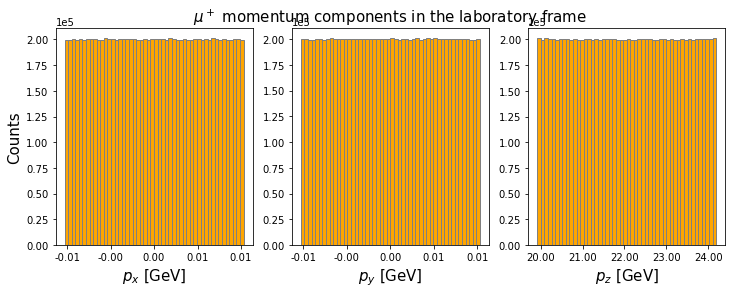

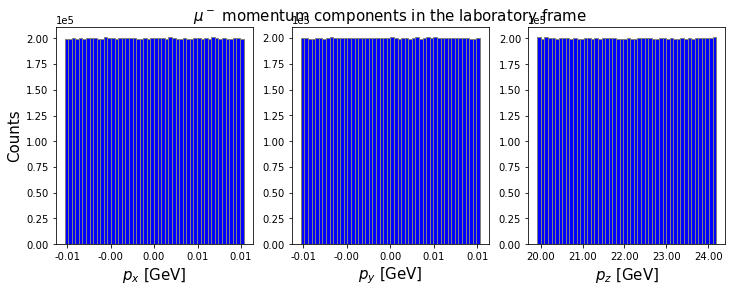

In [30]:
plot_momenta_hist(pxm_lb,pym_lb,pzm_lb,r'$\mu^+$ momentum components in the laboratory frame','orange')
plot_momenta_hist(pxm_lb,pym_lb,pzm_lb,r'$\mu^-$ momentum components in the laboratory frame','blue')

In [31]:
#Inser Pandas table with some statistics






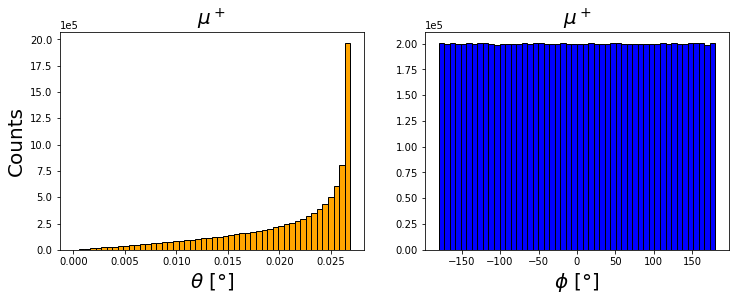

Maximum theta according to the theory [Antonelli] 0.02674 deg
Maximum theta in the simulation                   0.02686 deg


In [32]:
theta_lb = np.arccos(pzm_lb/np.sqrt(pxm_lb**2+pym_lb**2+pzm_lb**2))
phi_lb = np.arctan2(pym_lb,pxm_lb)

plot_angles_hist(theta_lb*deg, phi_lb*deg, 'orange','blue')

theta_max_t = 4 * electron_mass /E **2 * np.sqrt(E **2 /4. -muon_mass**2)
print('Maximum theta according to the theory [Antonelli]', "{:.5f}".format(theta_max_t*deg), "deg")
print('Maximum theta in the simulation                  ', "{:.5f}".format(np.max(theta_lb)*deg), "deg")

In [33]:
p_cm = -E**2/4 + pxm**2+pym**2+pzm**2
print('Squared four momentum in the CM frame',p_cm)

E_lb = gamma*(E/2-pzm*vz)
p_lb = -E_lb**2 + pxm_lb**2+pym_lb**2+pzm_lb**2
print('Squared four momentum in the LB frame',p_lb)

print('Muon energy in the laboratory frame',E_lb)

Squared four momentum in the CM frame [-0.01116369 -0.01116369 -0.01116369 ... -0.01116369 -0.01116369
 -0.01116369]
Squared four momentum in the LB frame [-0.01116369 -0.01116369 -0.01116369 ... -0.01116369 -0.01116369
 -0.01116369]
Muon energy in the laboratory frame [21.35700649 21.10596613 22.2081303  ... 22.16890774 22.47856199
 20.84815694]


In [34]:
#Write the results to a file 

s1_muons_com = pd.DataFrame({'Theta' : theta_instances,'Phi' : phi_instances,'Muon px' : pxm, 'Muon py' : pym, 'Muon pz' : pzm})
#s1_muons_com.to_csv('s1_muons_momentum_com.csv', index=False)

s1_muons_lab = pd.DataFrame({'Theta' : theta_lb,'Phi' : phi_lb,'Muon px' : pxm_lb, 'Muon py' : pym_lb, 'Muon pz' : pzm_lb})
#s1_muons_lab.to_csv('s1_muons_momentum_lab.csv', index=False)

In [35]:
#Inser 3d plot of a sphere with a heatmam

In [36]:
#
###
####
#####
######
#######
######
#####
###
##
#

## Properties of the target 
6. assume a $3$ cm thick Beryllium block is used as target and a rate of positron on target of $10^6$ Hz. Compute the rescaling factor (weight) you need to apply to the $N$ simulated events such that they represent the statistics that would be gathered in a week of countinuous operations;


The number of $\mu^+ \mu^-$ pairs produced per positron on the target is given by:


$$n(\mu^+ \mu^-) = n^+ \rho^- l \sigma(\mu^+ \mu^-)$$


where $n^+$ is the number of positrons, $\rho^-$ is the electron density in the medium, $l$ is the thickness of the target, and $\sigma(\mu^+ \mu^-)$ is the muon pairs production cross section. [Antonelli]





In [37]:
#We build a dataframe with some material properties to be analysed

Material = ['H',    'He',   'Li',  'Be',    'B',    'C',     'Cu',   'W',    'Pb']
Z        = [ 1 ,     2,      3,     4,       5,      6,       29,     74,     82]
A        = [1.00794, 4.0026, 6.941, 9.01218, 10.811, 12.0107, 63.546, 183.84, 207.2]
X0       = [900.6,   786,    156.2, 35.2,    22.2,   21.4,    1.4,    0.4,    0.6]

properties_dic = {'Material': Material, 'Z': Z, 'A': A, 'X0': X0}
properties = pd.DataFrame(data=properties_dic)
properties


,Material,Z,A,X0
0,H,1,1.00794,900.6
1,He,2,4.00260,786.0
2,Li,3,6.94100,156.2
3,Be,4,9.01218,35.2
4,B,5,10.81100,22.2
5,C,6,12.01070,21.4
6,Cu,29,63.54600,1.4
7,W,74,183.84000,0.4
8,Pb,82,207.20000,0.6


In [38]:
######
#Realistic target
positron_frequency = 1.e6                    #[Hz]
target_length      = 3                       #[cm]
cs                 = cros_section(E)*10.e-31 #[uBarn]--> [cm^2]
time               = 60 * 60 *24 *7          #[secconds]


properties['L'] = target_length
properties['Cross section'] = cs


#Number of positrons 
N_positrons = positron_frequency * time 

#Number of muons
properties['N_muons'] = N_positrons * (properties['Z']*Avogadro_number/properties['A']) * properties['Cross section'] * properties['L']

#Weight
rf = properties.at[3,'N_muons']/N
####

In [39]:
properties

,Material,Z,A,X0,L,Cross section,N_muons
0,H,1,1.00794,900.6,3,2.792678e-31,302740.227535
1,He,2,4.00260,786.0,3,2.792678e-31,152472.885096
2,Li,3,6.94100,156.2,3,2.792678e-31,131887.617753
3,Be,4,9.01218,35.2,3,2.792678e-31,135436.258460
4,B,5,10.81100,22.2,3,2.792678e-31,141126.623320
5,C,6,12.01070,21.4,3,2.792678e-31,152436.070308
6,Cu,29,63.54600,1.4,3,2.792678e-31,139256.216966
7,W,74,183.84000,0.4,3,2.792678e-31,122827.757211
8,Pb,82,207.20000,0.6,3,2.792678e-31,120761.615662


In [40]:
print('Number of positrons produced in a week                                 '"{:.2e}".format( N_positrons))
print('')
print('Number of simulated events                                             '"{:.2e}".format( N ))
print('')
print('Rescaling factor if using Be as a target', '%.5f' % rf)
print('')
print('Number of muons produced after a week using Be as a target             '"{:.2e}".format( properties.at[3,'N_muons']))

Number of positrons produced in a week                                 6.05e+11

Number of simulated events                                             1.00e+07

Rescaling factor if using Be as a target 0.01354

Number of muons produced after a week using Be as a target             1.35e+05


In [41]:
#
###
####
#####
######
####### 
######
#####
###
##
#

## Properties of  the beam
7. repeat what done so far simulating now the actual transverse shape and energy spread of the beam: for the former assume a flat distribution in a circle of radius $r=1$ cm and for the latter a gaussian distribution centered at the nominal beam energy and a width of $0.5$ GeV;

In [42]:
##################################################################################
#Simulation parameters

N = 10**7  #Number of positrons
E_lab = 45  #GeV
sigma = 0.5 # mean and standard deviation

###################################################################################

In [43]:
#Realistic beam
#Up to this point we have been assuming that the energy of the incident 
#beam had a constant value, now we want to make a model where the energy
#of the beam has a gaussian distribution.

E_lab_instances = np.random.normal(E_lab, sigma, N)

#Now we need to boost them to the CoM frame
vz    = np.sqrt((E_lab-electron_mass)/(E_lab+electron_mass))
gamma = 1/np.sqrt(1-vz**2)

E_cm_instances = 2 *gamma*(E_lab_instances-vz*np.sqrt(E_lab_instances**2-electron_mass**2))

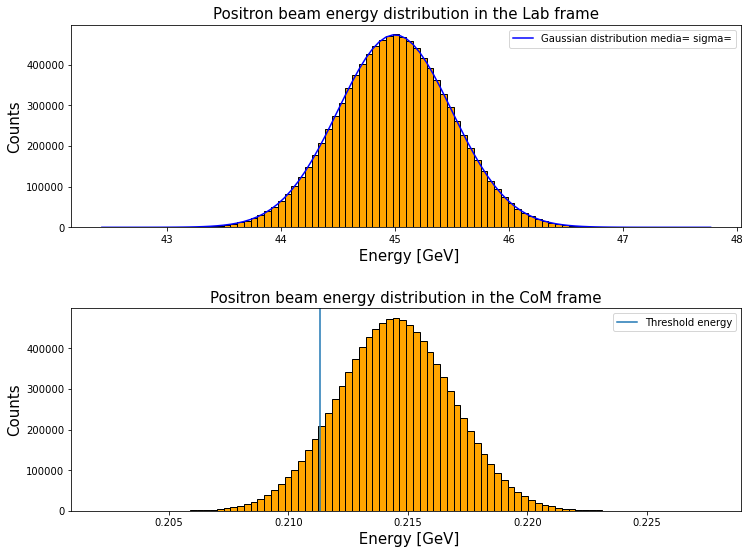

In [44]:
#Plot scaled histogram
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

n, bins, _ = ax1.hist(E_lab_instances, bins=90,color='orange', ec='black')

d = (bins[1]-bins[0])
scaling = d * n.sum()

ax1.plot(bins, scaling/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - E_lab)**2 / (2 * sigma**2) ),color='blue', label='Gaussian distribution media= sigma=')

ax1.set_title('Positron beam energy distribution in the Lab frame', fontsize=15)
ax1.set_xlabel(' Energy [GeV]', fontsize=15)
ax1.set_ylabel('Counts', fontsize=15)
ax1.legend()

n, bins, _ = ax2.hist(E_cm_instances, bins=90,color='orange', ec='black')

d = (bins[1]-bins[0])
scaling = d * n.sum()

ax2.axvline(x=2*muon_mass, label='Threshold energy')
#ax2.plot(bins, scaling/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - E_lab)**2 / (2 * sigma**2) ),color='blue', label='PDF')
ax2.set_title('Positron beam energy distribution in the CoM frame', fontsize=15)
ax2.set_xlabel(' Energy [GeV]', fontsize=15)
ax2.set_ylabel('Counts', fontsize=15)
ax2.legend()

plt.subplots_adjust(top=0.8, wspace=0.4, hspace=0.4)

plt.show()

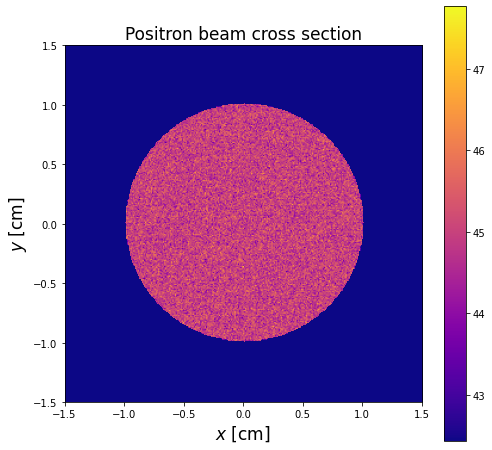

In [45]:
#Once we have the energy distribution plot a heatmap of the beam

def circular_section(data):
    
    # specify circle parameters: centre ij and radius
    pixels =len(data[0,:])
    ci,cj = pixels/2 , pixels/2
    cr=pixels/3

    # Create index arrays to z
    I,J=np.meshgrid(np.arange(data.shape[0]),np.arange(data.shape[1]))

    # calculate distance of all points to centre
    dist=np.sqrt((I-ci)**2+(J-cj)**2)

    # Assign value of 1 to those points where dist<cr:
    data[np.where(dist>cr)]=0
    return data



pixels=300
size  =(-1.5,1.5,-1.5,1.5)

# We randomly pick (pixel x pixels) elements of the energy distribution to plot the beam cross section

z = np.random.choice(E_lab_instances, size=(pixels,pixels), replace=True, p=None) 


plt.rcParams["figure.figsize"] = (8,8)
plt.imshow(circular_section(z),cmap='plasma', extent=(size),origin='lower')
plt.title('Positron beam cross section',fontsize=17)
plt.ylabel(r'${y}$ [cm]',fontsize=17)  
plt.xlabel(r'${x}$ [cm]',fontsize=17)
plt.colorbar()
plt.clim(np.min(E_lab_instances),np.max(E_lab_instances))
plt.show()

In [46]:
#
###
####
#####
######
####### SIMULATION 2
######
#####
###
##
#

In [47]:
##################################################################################
#Simulation parameters

N     = 10**6 #Number of positrons 
E_lab = 45    #GeV
sigma = 0.5   # mean and standard deviation

###################################################################################

In [48]:
##Now that we have the energy distributions and also an idea of the shape
##we can repeat the previous part

#Obtain the positron energy samples in the laboratory frame
E_lab_samples = np.random.normal(E_lab, sigma, N)

#Boost of the positrons energy to the Center of Mass Frame
vz    = np.sqrt((E_lab-electron_mass)/(E_lab+electron_mass))   
gamma = 1/np.sqrt(1-vz**2)

E_cm_samples = 2 *gamma*(E_lab_samples-vz*np.sqrt(E_lab_samples**2-electron_mass**2))

#Filter the values below the threshold
E_cm_samples = E_cm_samples[E_cm_samples> 2* muon_mass]

N_instances = len(E_cm_samples)

#######################
# DEPRECATED
#EXTREMELY INEFICIENT METHOD TO GET THETA takes around 25 minutes for 10**5 positrons
#theta_cm_instances = np.arange(0,0)
#for i in range(0,N_instances):
#    theta_cm_instances = np.append(theta_cm_instances,np.random.choice(accept_reject(10**5,#pdf_theta_normalized,box,E_cm_samples[i])))

theta_cm_instances = inv_cdf(E_cm_samples,np.random.random(N_instances))

phi_cm_instances   = np.random.uniform(0., 2*np.pi, N_instances)

In [49]:
#Calculate the total momentum p       CM
#Calculate the momentum components in CM
p_cm_instances = np.sqrt(E_cm_samples**2/4-muon_mass**2)

pxm_cm = p_cm_instances * np.sin(theta_cm_instances)*np.cos(phi_cm_instances)
pym_cm = p_cm_instances * np.sin(theta_cm_instances)*np.sin(phi_cm_instances)
pzm_cm = p_cm_instances * np.cos(theta_cm_instances)

#Calculate the momentum components in LAB
vz = -np.sqrt(1-4*electron_mass**2/E_cm_samples**2)   
gamma = 1/np.sqrt(1-vz**2)

pxm_lb = pxm_cm
pym_lb = pym_cm
pzm_lb = gamma * pzm_cm - vz * gamma *E_cm_samples/2

#Calculate the total momentum p       LAB
#Obtain the angles thet and phi       LAB
p_lb_instances = np.sqrt(pxm_lb**2 + pym_lb**2 + pzm_lb**2)

theta_lb_instances = np.arccos(pzm_lb/p_lb_instances)
phi_lb_instances   = np.arctan2(pym_lb,pxm_lb)

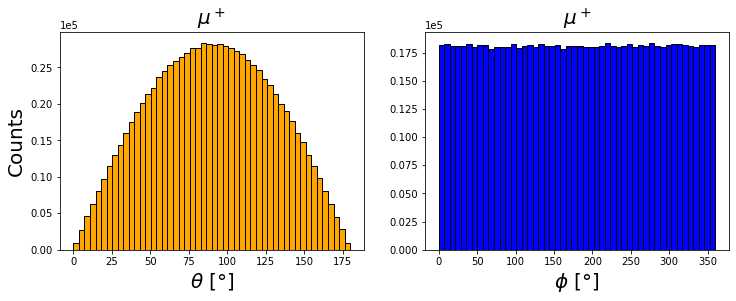

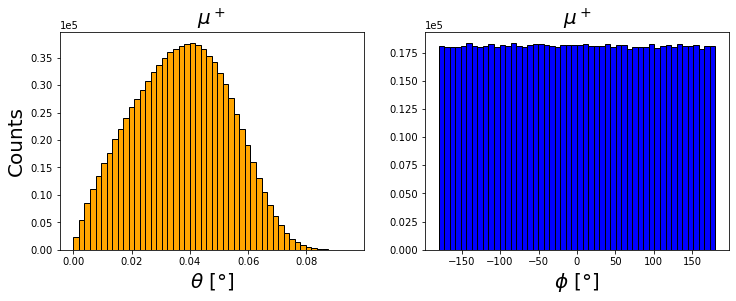

Maximum theta according to the theory [Antonelli] 0.00158 deg
Maximum theta in the simulation                   0.09501 deg
The media for the theta angle                     0.03713 deg


In [50]:
plot_angles_hist(theta_cm_instances*deg,phi_cm_instances*deg,'orange','blue')
plot_angles_hist(theta_lb_instances*deg,phi_lb_instances*deg,'orange','blue')

theta_max_t = 4 * electron_mass /np.max(E_cm_samples) **2 * np.sqrt(np.max(E_cm_samples) **2 /4. -muon_mass**2)
print('Maximum theta according to the theory [Antonelli]', "{:.5f}".format(theta_max_t), "deg")
print('Maximum theta in the simulation                  ', "{:.5f}".format(np.max(theta_lb_instances)*deg), "deg")
print('The media for the theta angle                    ', "{:.5f}".format(np.average(theta_lb_instances)*deg), "deg")

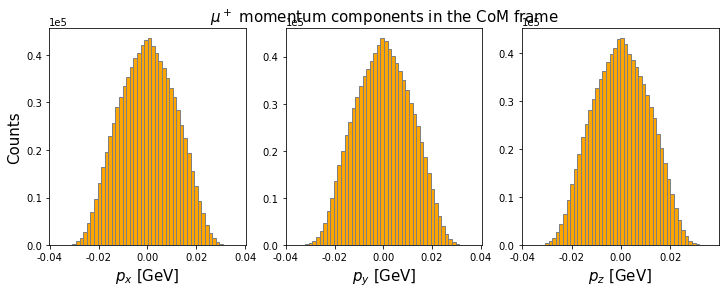

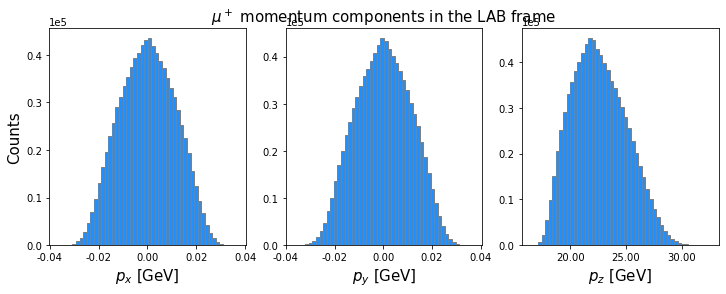

In [51]:
plot_momenta_hist(pxm_cm,pym_cm,pzm_cm,r'$\mu^+$ momentum components in the CoM frame','orange')
plot_momenta_hist(pxm_lb,pym_lb,pzm_lb,r'$\mu^+$ momentum components in the LAB frame','dodgerblue')

In [52]:
#Write the results to a file 

s2_muons_com = pd.DataFrame({'Theta' : theta_cm_instances,'Phi' : phi_cm_instances,'Muon px' : pxm_cm, 'Muon py' : pym_cm, 'Muon pz' : pzm_cm})
#s2_muons_com.to_csv('s2_muons_momentum_com.csv', index=False)

s2_muons_lab = pd.DataFrame({'Theta' : theta_lb_instances,'Phi' : phi_lb_instances,'Muon px' : pxm_lb, 'Muon py' : pym_lb, 'Muon pz' : pzm_lb})
#s2_muons_lab.to_csv('s2_muons_momentum_lab.csv', index=False)

In [53]:
#I would like to plot a sphere with a heatmap showing the muons distribution

## Aditional considerations

8. given that the electrons traversing the target lose energy as $E(z)=E_0 \exp{-z/X_0}$ (with z the longitudinal coordinate of the target, the one parallel to the beam direction and $X_0$ is the Beryllium radiation length), compute the nominal beam energy $E_0$ such that muon pairs can be generated along the whole length of the target;
9. (optional) take the former point into account when generating the events (i.e. the proccess $\sqrt{s}$ depend on the position along the target where the $e^+ - e^-$ scattering occurrs.



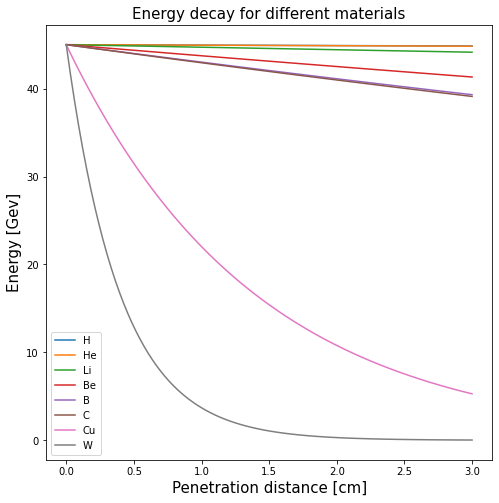

In [54]:
#Plots of energy decay for different materials
x = np.linspace(0,3,num=100)
for i in range(0,8):
    plt.plot(x, 45 * np.exp(-x/properties.at[i,'X0']),label = properties.at[i,'Material'])
plt.title('Energy decay for different materials', fontsize=15)
plt.xlabel('Penetration distance [cm]', fontsize=15)
plt.ylabel('Energy [Gev]', fontsize=15)
plt.legend()
plt.show()

In [55]:
#
###
####
#####
######
####### SIMULATION 3
######
#####
###
##
#

In [56]:
##################################################################################
#Simulation parameters

N     = 10**6 #Number of positrons
E_lab = 45    #[GeV]
sigma = 0.5   # mean and standard deviation

###################################################################################

In [57]:
E0_cm = 2 *muon_mass/np.exp(-target_length/properties.at[3,'X0'])

print('Beryllium radiation length',properties.at[3,'X0'],'Cm')
print('Nominal beam energy in the CoM frame', '%.5f' % E0_cm, 'GeV')

vz    = -np.sqrt(1-4*electron_mass**2/E0_cm**2)   
gamma = 1/np.sqrt(1-vz**2)
p     = np.sqrt(E0_cm**2/4-muon_mass**2)
pzm = p * np.cos(0)                                       #Where does p come from?#####
E0_lb = gamma*(E0_cm/2-pzm*vz)

E0_lb =(2*muon_mass**2/electron_mass -electron_mass)*np.exp(target_length/properties.at[3,'X0']) ##CORRECT
print('Nominal beam energy in the Lab frame', '%.5f' % E0_lb, 'GeV')

Beryllium radiation length 35.2 Cm
Nominal beam energy in the CoM frame 0.23012 GeV
Nominal beam energy in the Lab frame 47.58023 GeV


In [58]:
#be generated along the whole length of the target as the media.
#E_lab = E0_lb   

#Obtain the positron energy samples in the laboratory frame
E_lab_samples = np.random.normal(E_lab, sigma, N)

#We keep the distribution for ploting purposes
E_lab_plot = E_lab_samples 

#Now we distribute the energies according the position in the Beryllium plate
##########################################################################
x = np.random.uniform(low=0., high=target_length, size=(len(E_lab_samples),))
E_lab_samples = E_lab_samples*np.exp(-x/properties.at[3,'X0'])
##########################################################################

#Boost of the positrons energy to the Center of Mass Frame
vz    = np.sqrt((E_lab_samples-electron_mass)/(E_lab_samples+electron_mass))   
gamma = 1/np.sqrt(1-vz**2)

E_cm_samples = 2 *gamma*(E_lab_samples-vz*np.sqrt(E_lab_samples**2-electron_mass**2))

#Filter the values below the threshold
b = E_cm_samples[E_cm_samples> 2* muon_mass]

N_instances = len(b)


#######################
# DEPRECATED
#EXTREMELY INEFICIENT METHOD TO GET THETA takes around 25 minutes
#theta_cm_instances = np.arange(0,0)
#for i in range(0,N_instances):
#    theta_cm_instances = np.append(theta_cm_instances,np.random.choice(accept_reject(10**5,#pdf_theta_normalized,box,b[i])))

theta_cm_instances = inv_cdf(b,np.random.random(N_instances))

phi_cm_instances   = np.random.uniform(0., 2*np.pi, N_instances)

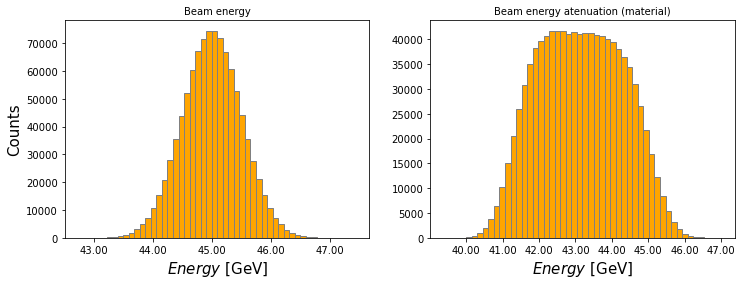

In [59]:
#Energy distributions
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

n, bins, _ = ax1.hist(E_lab_plot, bins=50,color='orange', ec='grey')
ax1.set_title('Beam energy', fontsize=10)
ax1.set_xlabel(r'$Energy$ [GeV]', fontsize=15)
ax1.set_ylabel('Counts', fontsize=15)
#ax1.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


n, bins, _ = ax2.hist(E_lab_samples, bins=50,color='orange', ec='grey')
ax2.set_title('Beam energy atenuation (material)', fontsize=10)
ax2.set_xlabel(r'$Energy$ [GeV]', fontsize=15)
#ax2.ticklabel_format(axis="y", style="sci", scilimits=(5,5))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

In [60]:
#Calculate the total momentum p       CM
#Calculate the momentum components in CM
p_cm_instances = np.sqrt(b**2/4-muon_mass**2)

pxm_cm = p_cm_instances * np.sin(theta_cm_instances)*np.cos(phi_cm_instances)
pym_cm = p_cm_instances * np.sin(theta_cm_instances)*np.sin(phi_cm_instances)
pzm_cm = p_cm_instances * np.cos(theta_cm_instances)

#Calculate the momentum components in LAB
vz = -np.sqrt(1-4*electron_mass**2/b**2)   
gamma = 1/np.sqrt(1-vz**2)

pxm_lb = pxm_cm
pym_lb = pym_cm
pzm_lb = gamma * pzm_cm - vz * gamma *b/2

#Calculate the total momentum p       LAB
#Obtain the angles thet and phi       LAB
p_lb_instances = np.sqrt(pxm_lb**2 + pym_lb**2 + pzm_lb**2)

theta_lb_instances = np.arccos(pzm_lb/p_lb_instances)
phi_lb_instances   = np.arctan2(pym_lb,pxm_lb)

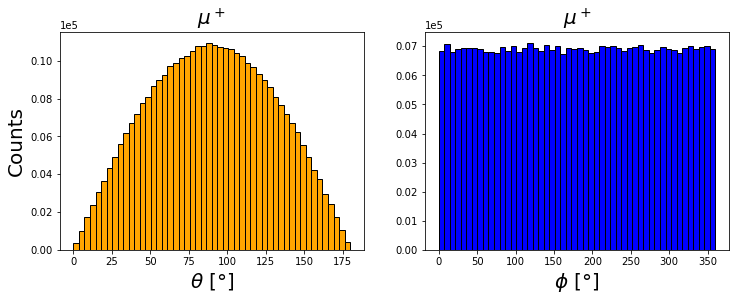

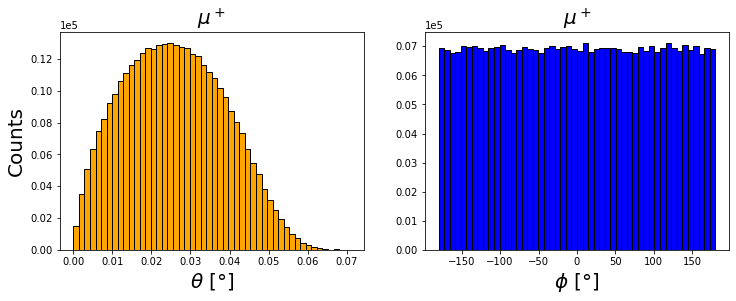

Maximum theta according to the theory [Antonelli] 0.07076 deg
Maximum theta in the simulation                   0.07088 deg
The media for the theta angle                     0.02598 deg


In [61]:
plot_angles_hist(theta_cm_instances*deg,phi_cm_instances*deg,'orange','blue')
plot_angles_hist(theta_lb_instances*deg,phi_lb_instances*deg,'orange','blue')

theta_max_t = 4 * electron_mass /np.max(b) **2 * np.sqrt(np.max(b) **2 /4. -muon_mass**2)
print('Maximum theta according to the theory [Antonelli]', "{:.5f}".format(theta_max_t*deg), "deg")
print('Maximum theta in the simulation                  ', "{:.5f}".format(np.max(theta_lb_instances)*deg), "deg")
print('The media for the theta angle                    ', "{:.5f}".format(np.average(theta_lb_instances)*deg), "deg")

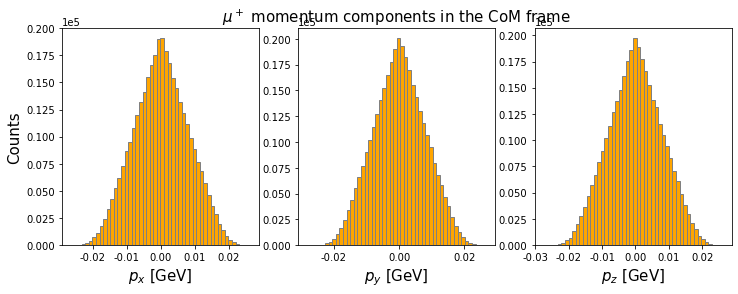

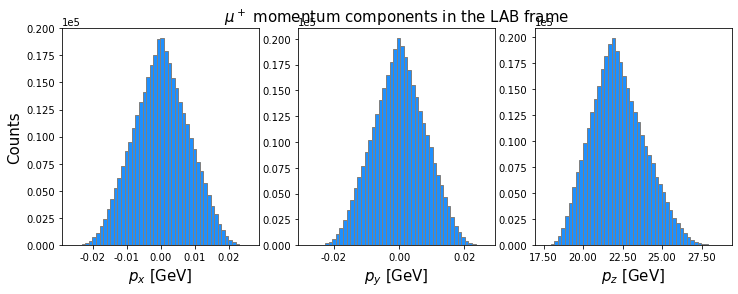

In [62]:
plot_momenta_hist(pxm_cm,pym_cm,pzm_cm,r'$\mu^+$ momentum components in the CoM frame','orange')
plot_momenta_hist(pxm_lb,pym_lb,pzm_lb,r'$\mu^+$ momentum components in the LAB frame','dodgerblue')

In [63]:
#Write the results to a file 

s3_muons_com = pd.DataFrame({'Theta' : theta_cm_instances,'Phi' : phi_cm_instances,'Muon px' : pxm_cm, 'Muon py' : pym_cm, 'Muon pz' : pzm_cm})
#s3_muons_com.to_csv('s3_muons_momentum_com.csv', index=False)

s3_muons_lab = pd.DataFrame({'Theta' : theta_lb_instances,'Phi' : phi_lb_instances,'Muon px' : pxm_lb, 'Muon py' : pym_lb, 'Muon pz' : pzm_lb})
#s3_muons_lab.to_csv('s3_muons_momentum_lab.csv', index=False)

In [64]:
#Can we estimate the muons beams cross section? I think it's radius is 1 cm + 1mm
#1 cm from the positrons beam and 1 mm due to the scatering process.

In [65]:
#We can estimate an average cross section and estimate the number of produced muons.
#hi

In [66]:
############      ####      ###      ######
############      #####     ###      ### ###
###               ######    ###      ###  ### 
###               ### ###   ###      ###   ###
############      ###  ###  ###      ###    ###
############      ###   ### ###      ###     ###
###               ###    ## ###      ###    ###
###               ###     #####      ###   ###
############      ###      ####      ###  ###
############      ###       ###      ### ###
############################################